In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=sns.load_dataset('iris')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Modelling Without Parameter

In [8]:
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier

In [10]:
x=df.drop('species', axis=1)
y=df['species']

In [15]:
X_train,X_test,y_train,y_test=tts(x,y, random_state=101)

In [16]:
model = DecisionTreeClassifier(random_state=101)

In [22]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

In [34]:
from sklearn.tree import export_graphviz
export_graphviz(model,out_file='without_param.dot', feature_names=X_train.columns, class_names=df.species.unique(), rounded=True, proportion=False, precision=2, filled=True)

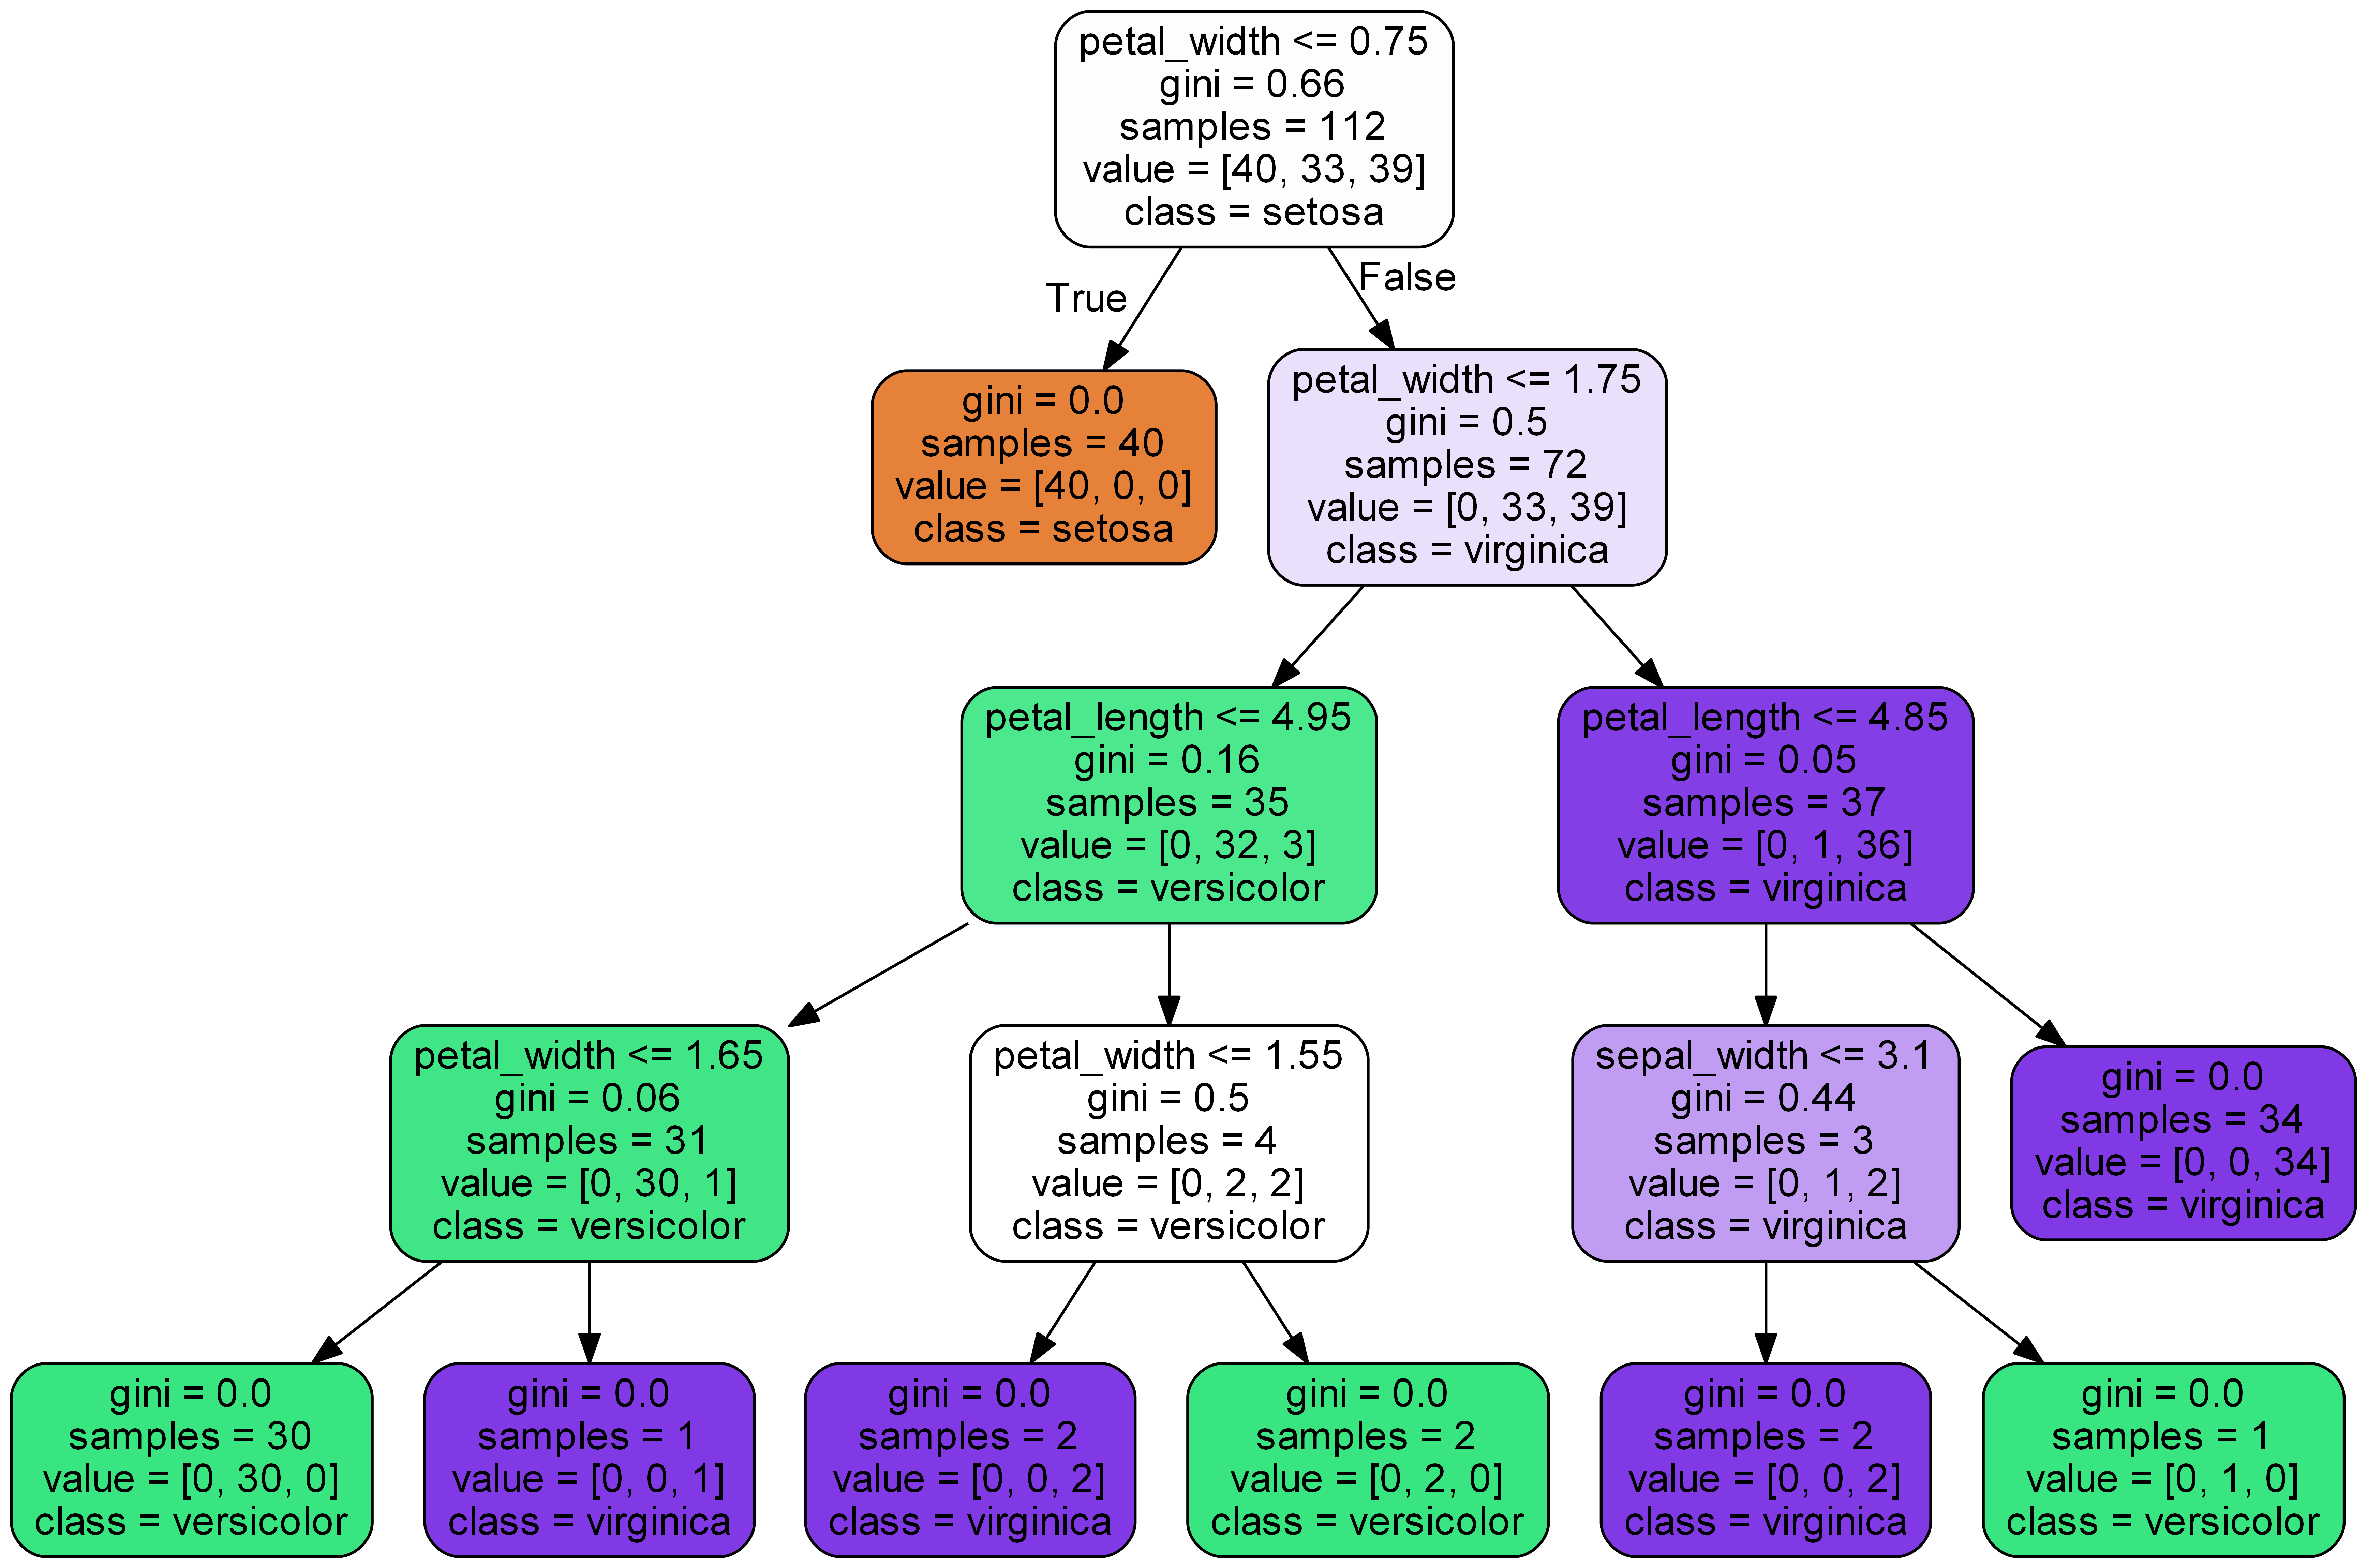

In [36]:
from IPython.display import Image
Image(filename='without_param.png')

In [28]:
df[df['petal_width']>0.75]['species'].value_counts()

versicolor    50
virginica     50
Name: species, dtype: int64

In [47]:
prediction=model.predict(X_test)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

   micro avg       0.97      0.97      0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [33]:
temp = pd.concat([X_test,y_test], axis=1)

## Modelling With Parameter

### Minimum Sample Leaf

In [38]:
model_2 = DecisionTreeClassifier(random_state=101, min_samples_leaf=30)

In [41]:
model_2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

In [42]:
from sklearn.tree import export_graphviz
export_graphviz(model_2,out_file='with_param_1.dot', feature_names=X_train.columns, class_names=df.species.unique(), rounded=True, proportion=False, precision=2, filled=True)

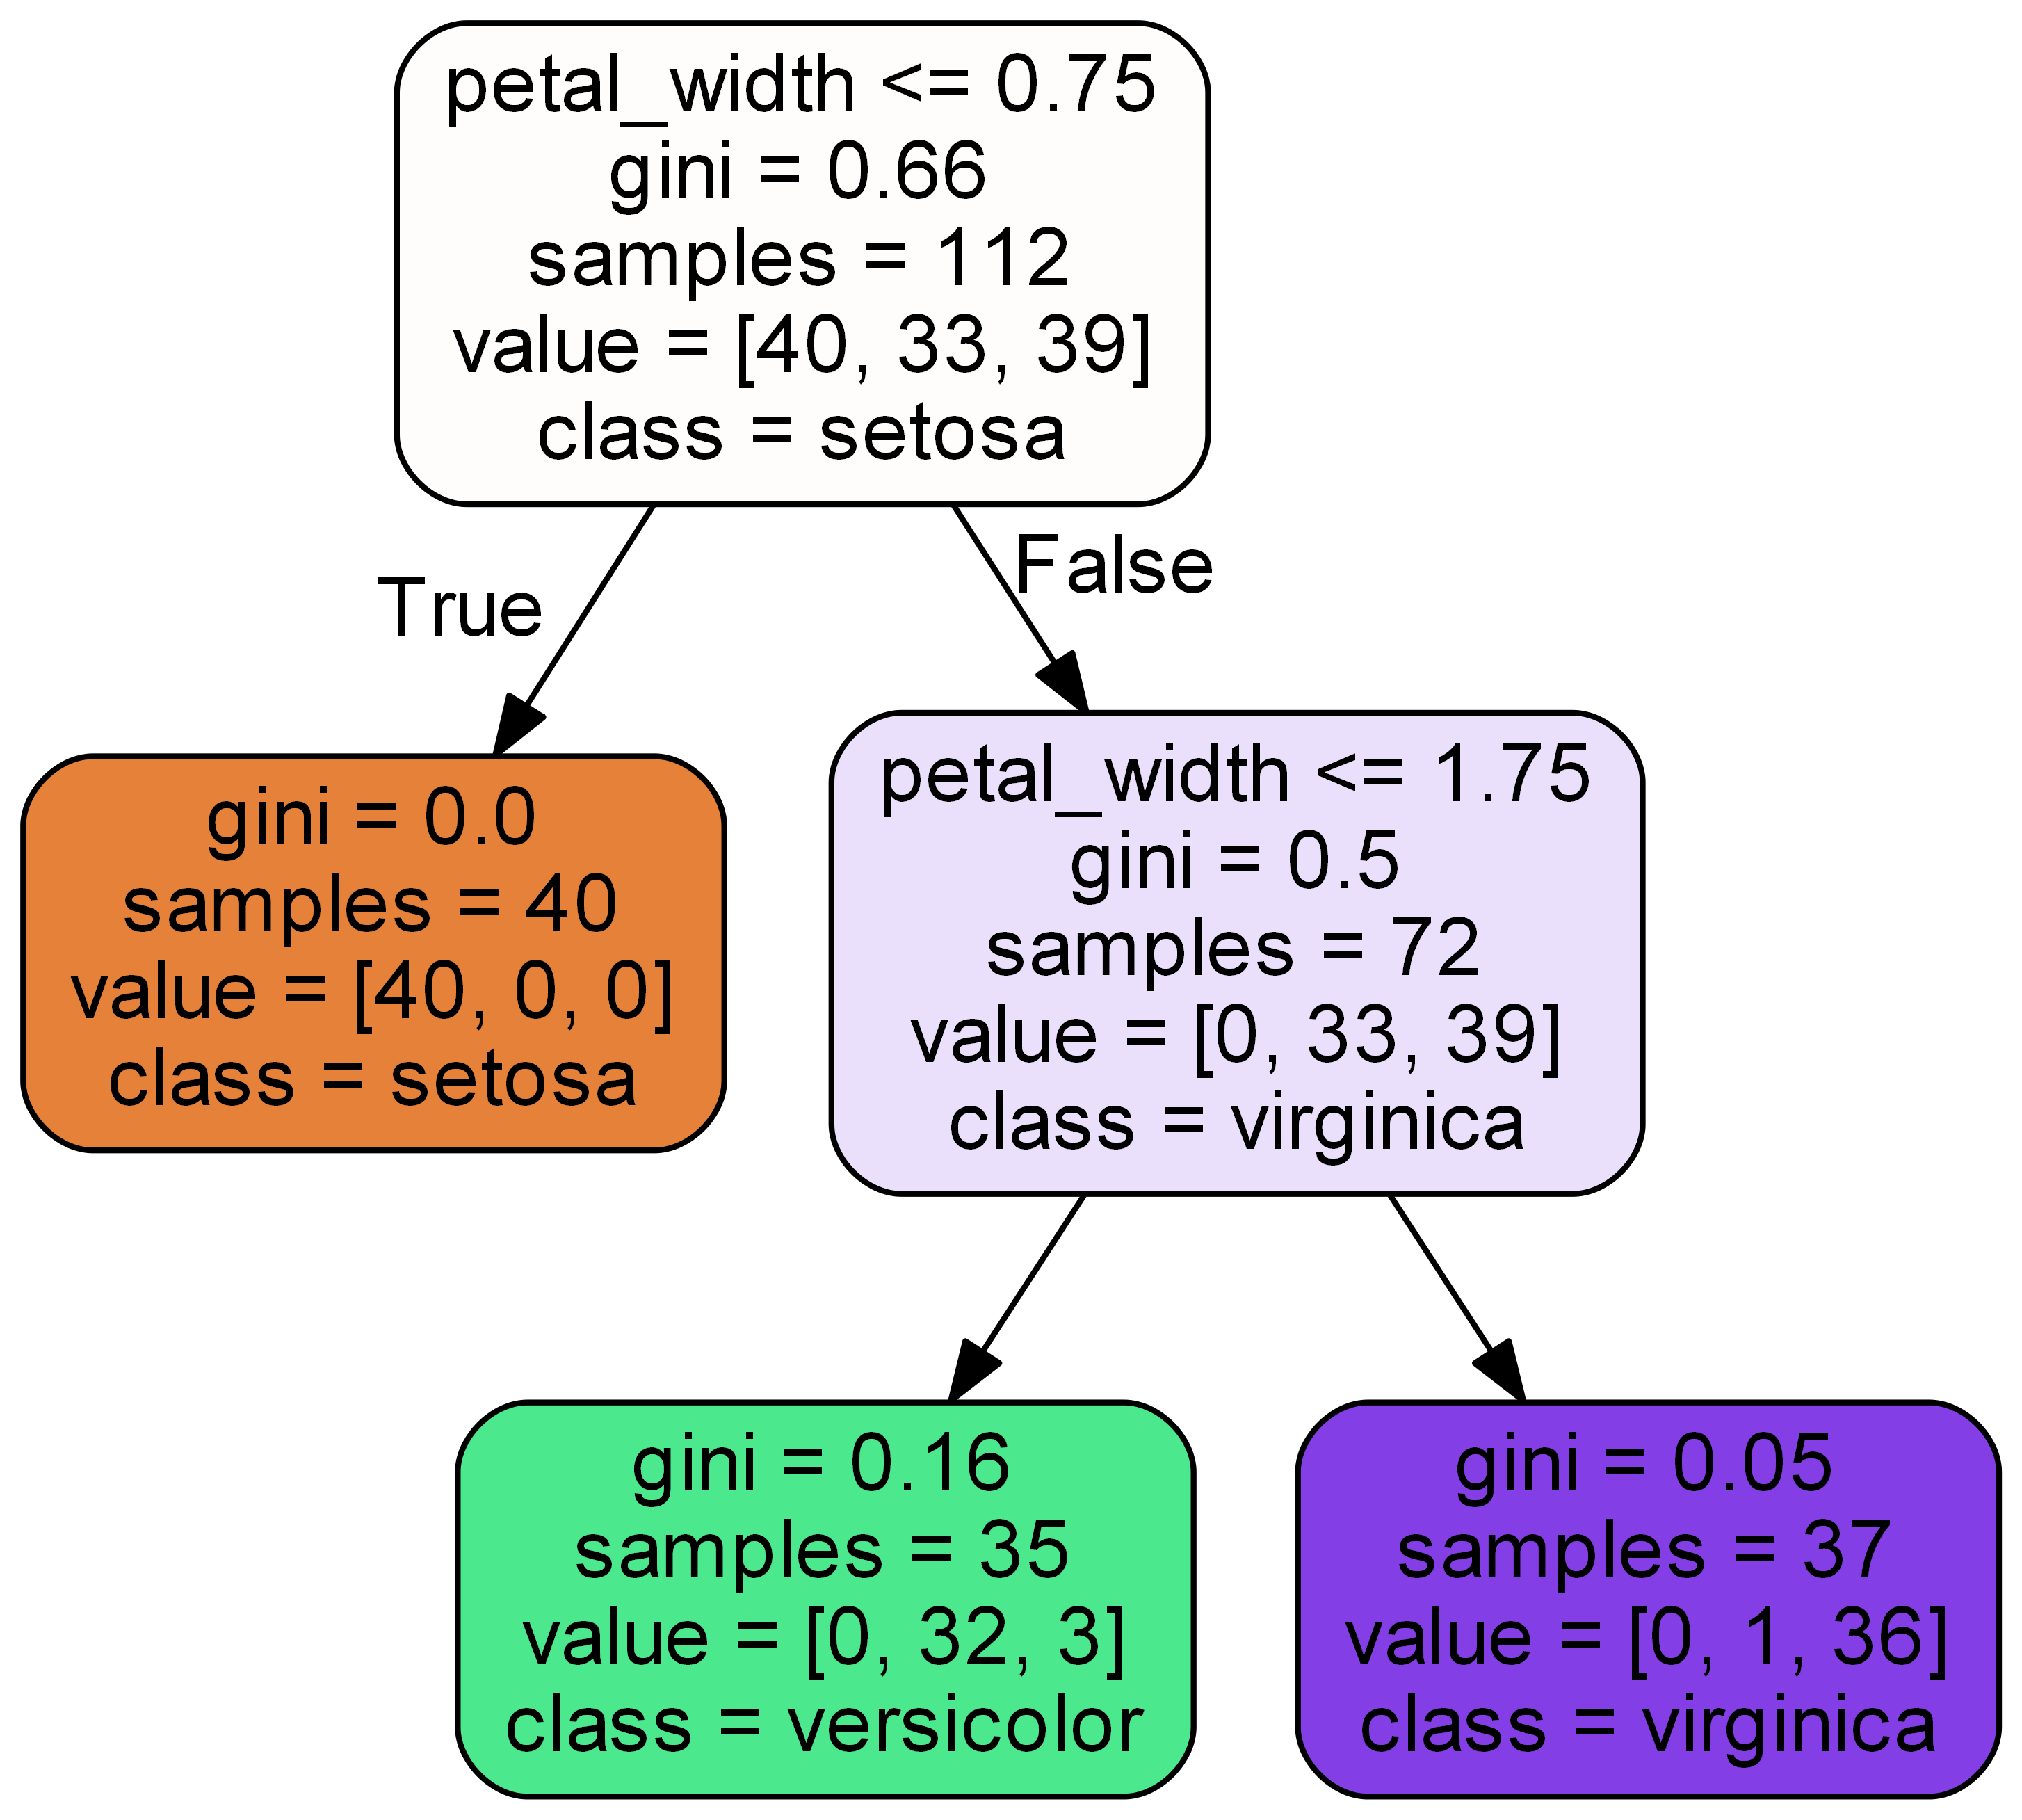

In [43]:
from IPython.display import Image
Image(filename='with_param_1.png')

In [45]:
prediction_2=model_2.predict(X_test)

In [46]:
print(classification_report(y_test,prediction_2))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      1.00      0.94        17
   virginica       1.00      0.82      0.90        11

   micro avg       0.95      0.95      0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38



## Minimum Sample Split